In [43]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/zhangxinhua/Desktop/Python/Theory/Machine Learning/Andrew Ng Coursera/Exercises/machine-learning-ex1/ex1')

## Exercise 1: Create a 5 x 5 identity matrix (Warm up)

In [16]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Exercise 2: Linear Regression with One Variable

### 2.1 Plot the data

In [32]:
data = pd.read_csv('ex1data1.txt', header=None)
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [141]:
X = data.iloc[:, 0]
y = data.iloc[:, 1]
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit vs. Population')

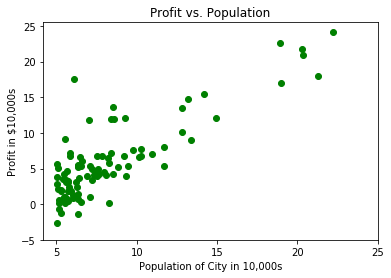

In [252]:
plt.scatter(X, y, c = 'g')
plt.xticks(np.arange(5, 30, 5))
plt.yticks(np.arange(-5, 30, 5))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population')

### 2.2 Gradient Descent

We already have the X and y from the data but we will add another dimension to our data to accomondate and $\theta_0$ intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01

In [119]:
data_n = data.values
type(data.values)

numpy.ndarray

In [114]:
m = len(data_n)
# use reshape to convert the (m,) shape array to (m, 1) array to append to the all ones array 

In [304]:
X= np.vstack((np.ones(m), data_n[:,0])).T
X[0:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [305]:
y = data_n[:,1]

In [193]:
# define 'compute cost function' function
def compute_cost(X, y, theta):
    "here the theta is not transposed, thus X needs to be transposed to get the same result"
    return 1 / 2 / m * np.sum((theta.dot(X.T) - y)**2)

In [181]:
computeCost(X, y, theta)

32.072733877455676

In [201]:
# needs two layers for np.zeros and np.ones (as the outlayer is for the dtype setting.)
theta_0 = np.zeros(2)
num_iters = 1500
alpha = 0.01

Now we implement gradient descent to optimize $\theta$, by minimizing the cost function J($\theta$)

In [209]:
def gradient_descent(X, y, theta_0, alpha, num_iters):

    J_history = np.zeros(num_iters)
    theta = theta_0.copy()
    for i in np.arange(num_iters):
        J_history[i] = compute_cost(X, y,  theta)
        theta -= alpha / m * (theta.dot(X.T) - y).dot(X)
        
    return theta, J_history

In [210]:
theta, J_history = gradient_descent(X, y, theta_0, alpha, num_iters)

In [217]:
print("h(x) =" + str(round(theta[0], 2)) + "+" +str(round(theta[1], 2)) + "x1")

h(x) =-3.63+1.17x1


Visualize cost function using Gradient Descent

Text(0.5, 1.0, 'Cost function using Gradient Descent')

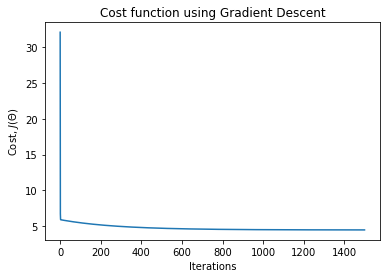

In [232]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost, $J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Define a function that returns the model prediction for profit given the population level and model parameters.

In [233]:
def prediction(theta, population):
    return theta[0] + population * theta[1]

Visualize and compare training data with linear regression predictions

([<matplotlib.axis.YTick at 0x1da4c877288>,
 <a list of 7 Text yticklabel objects>)

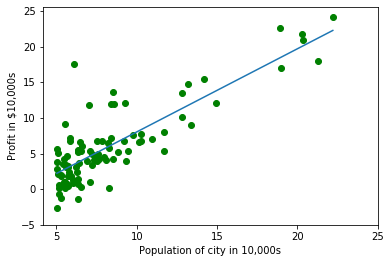

In [259]:
plt.figure()
X = data_n[:,0]
y = data_n[:,1]
plt.scatter(X,y, c = 'g')
x_range = np.linspace(min(X), max(X), 100)
# this is where we use the prediction function
plt.plot(x_range, prediction(theta, x_range))
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xticks(np.arange(5, 30, 5))
plt.yticks(np.arange(-5, 30, 5))

In [299]:
population = 3.5
prediction(theta, population) 
print("For population = "+'%s'%(population*10000) + ", we predict a profit of " +'%s'%(round(prediction(theta, population)*10000, 2) ))

For population = 35000.0, we predict a profit of 4519.77


In [300]:
population = 7
prediction(theta, population) 
print("For population = "+'%s'%(population*10000) + ", we predict a profit of " +'%s'%(round(prediction(theta, population)*10000, 2) ))

For population = 70000, we predict a profit of 45342.45


### 2.3 Visualizing the cost function

I am no idea what the codes are doing from here..just copying the codes for the fancy graphs

In [306]:
num_pts = 50
theta_0_low, theta_0_high = -10, 10
theta_1_low, theta_1_high = -1, 4

theta_0_pts = np.linspace(theta_0_low, theta_0_high, num_pts)
theta_1_pts = np.linspace(theta_1_low, theta_1_high, num_pts)
theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_pts, theta_1_pts)

cost_mesh = np.array([compute_cost(X, y, np.array([theta_0, theta_1])) for theta_0, theta_1 \
                      in zip(theta_0_mesh.ravel(), theta_1_mesh.ravel())]).reshape(theta_0_mesh.shape)

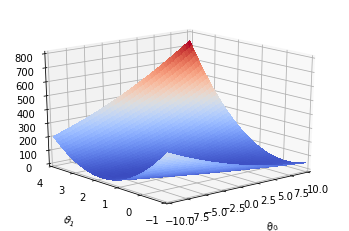

In [307]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_mesh, theta_1_mesh, cost_mesh, 
                rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$', labelpad=15)
ax.set_ylabel(r'$\theta_1$', labelpad=15)
ax.set_zlabel('Cost, ' + r'$J(\theta)$', labelpad=15)
ax.set_xlim(theta_0_low, theta_0_high)
ax.set_ylim(theta_1_low, theta_1_high)
ax.set_zlim(0, 800)
ax.view_init(elev=20., azim=230)

(-1, 4)

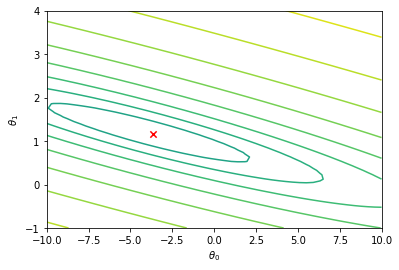

In [309]:
plt.figure()
plt.contour(theta_0_mesh, theta_1_mesh, np.log10(cost_mesh), np.linspace(-2, 3, 20))
plt.scatter(theta[0], theta[1], c='r', marker='x', s=40)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.xlim(theta_0_low, theta_0_high)
plt.ylim(theta_1_low, theta_1_high)

>We can see that the local mimimum is when $\theta_1$ equals to ~1.2 and $\theta_0$ equals to ~-3.6, which correspond to h(x) =-3.63+1.17x1